# Métodos estatísticos

In [2]:
# biblioteca:
import pandas as pd
import seaborn as sns

# dados (contas e gorjetas):
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### **1. Estatísticas descritivas**

In [4]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


> Sáida do método `.describe()`:

| Coluna | Descrição |
| ------ | --------- |
| **COUNT** | Contagem |
| **MEAN** | Média |
| **STD** | Desvio padrão |
| **MIN** | Valor mínimo |
| **25%** | Primeiro quartil (`Q1`, 25% dos dados) |
| **50%** | Segundo quartil ou **mediana** (`Q2`, 50% dos dados) |
| **75%** | Terceiro quartil (`Q3`, 75% dos dados) |
| **MAX** | Valor máximo |

In [5]:
tips.describe(include='category').T

,count,unique,top,freq
sex,244,2,Male,157
smoker,244,2,No,151
day,244,4,Sat,87
time,244,2,Dinner,176


### **2. Mínimo, máximo e amplitude**

> Qual foi a gorjeta mínima?

In [6]:
tips['tip'].min()

1.0

> Qual foi a maior conta (máximo `total_bill`)?

In [7]:
tips['total_bill'].max()

50.81

> Amplitude

$A = Max - Min$

In [8]:
tips['total_bill'].max() - tips['total_bill'].min()

47.74

### **3. Medidas de tendência central**

> Média

In [9]:
tips['tip'].mean()

2.99827868852459

> Mediana

In [10]:
tips['tip'].median()

2.9

> Moda

In [11]:
tips['day'].mode()

0    Sat
Name: day, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [12]:
# contagem (conferindo a moda):
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

### **4 Medidas de dispersão:**

> Desvio Padrão

In [15]:
std_amostra = tips['total_bill'].std()
std_pop = tips['total_bill'].std(ddof=0)

print(f'Amostra: {std_amostra}')
print(f'População: {std_pop}')

Amostra: 8.902411954856856
População: 8.884150577771132


> Variância

In [16]:
var_amostra = tips['total_bill'].var()
var_pop = tips['total_bill'].var(ddof=0)

print(f'Amostra: {var_amostra}')
print(f'População: {var_pop}')

Amostra: 79.25293861397827
População: 78.92813148851114


> Coeficiente de variação (CV)

In [18]:
gorjeta_media = tips['tip'].mean()
gorjeta_std = tips['tip'].std()

conta_media = tips['total_bill'].mean()
conta_std = tips['total_bill'].std()

cv_gorjeta = gorjeta_std / gorjeta_media
cv_conta  = conta_std / conta_media

print(cv_gorjeta)
print(cv_conta)

0.4614775118459888
0.44993620594706724


### **5. Medidas de posição:**

> Quartis

In [20]:
# Cálculo:
Q1 = tips['tip'].quantile(0.25)
Q2 = tips['tip'].quantile(0.50)
Q3 = tips['tip'].quantile(0.75)

print(f'Q1: {Q1}')
print(f'Q2: {Q2}')
print(f'Q3: {Q3}')

Q1: 2.0
Q2: 2.9
Q3: 3.5625


<Axes: xlabel='tip'>

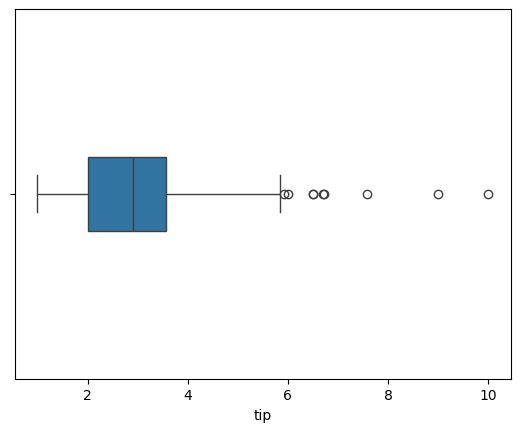

In [21]:
# Visualização (seaborn):
sns.boxplot(data=tips, x='tip', width=0.2)

> Percentis

In [22]:
tips['tip'].quantile(0.9)

5.0

In [23]:
tips['tip'].quantile(0.2)

2.0

### **6. Outliers via método IQR**

\begin{equation}
Outliers \ Inferiores = Q_1 - 1.5 IQR
\end{equation}

\begin{equation}
Outliers \ Superiores = Q_3 + 1.5 IQR
\end{equation}

In [24]:
# Cálculo:
Q1 = tips['tip'].quantile(0.25)
Q3 = tips['tip'].quantile(0.75)
IQR = Q3 - Q1

outliers_sup = Q3 + 1.5*IQR
outliers_inf = Q1 - 1.5*IQR

print(f'Outliers superiores: {outliers_sup}')
print(f'Outliers inferiores: {outliers_inf}')

Outliers superiores: 5.90625
Outliers inferiores: -0.34375


<Axes: ylabel='tip'>

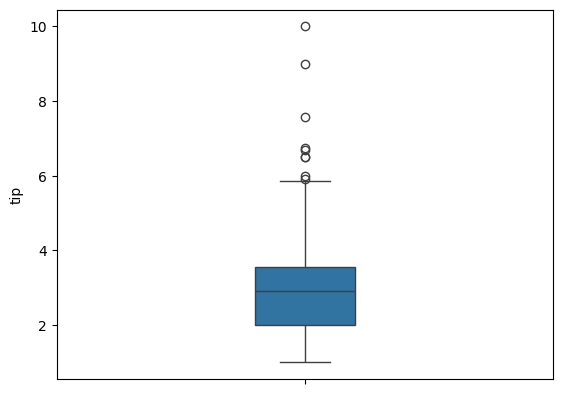

In [25]:
# Plot:
sns.boxplot(data=tips, y='tip', width=0.2)

### **7. Correlação entre variáveis**

> Paramétrica

In [27]:
# Cálculo:
conta_e_gorjeta = tips[['tip', 'total_bill']]
corr_pearson = conta_e_gorjeta.corr()
corr_pearson

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


<Axes: >

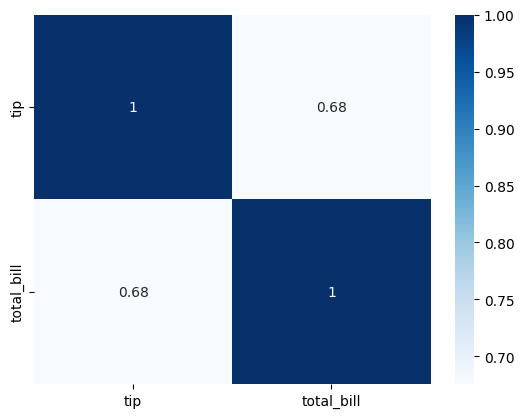

In [28]:
# Visualização:
sns.heatmap(corr_pearson, annot=True, cmap='Blues')

> Não-paramétrica

In [29]:
# Cálculo:
corr_spearman = conta_e_gorjeta.corr(method='spearman')
corr_spearman

,tip,total_bill
tip,1.000000,0.678968
total_bill,0.678968,1.000000


<Axes: >

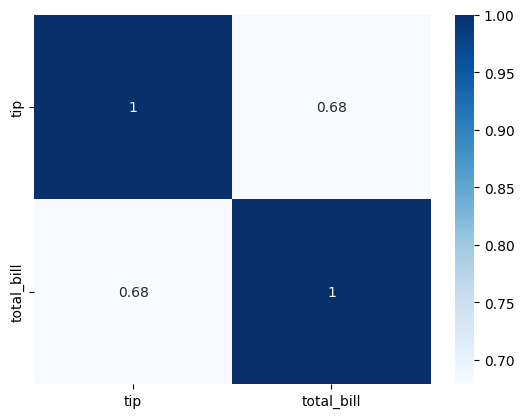

In [30]:
# Visualização:
sns.heatmap(corr_spearman, annot=True, cmap='Blues')

<Axes: xlabel='total_bill', ylabel='tip'>

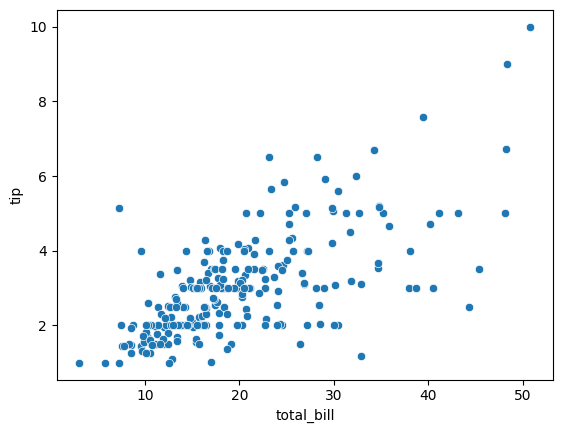

In [32]:
sns.scatterplot(data=tips, x='total_bill', y='tip')